In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [5]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [6]:
df.shape

(209673, 8)

In [7]:
#trip_duration - How long did the journey last?[in Seconds]
df['trip_duration'].isnull().sum()

0

In [8]:
df['trip_duration']=df['trip_duration'].astype(int)

In [9]:
df['trip_duration'].describe()

count    209673.000000
mean       1173.181478
std        4775.653621
min           0.000000
25%         446.000000
50%         707.000000
75%        1098.000000
max       86387.000000
Name: trip_duration, dtype: float64

In [10]:
#distance_traveled - How far did the taxi travel?[in Km]
df['distance_traveled'].isnull().sum()

0

In [11]:
df['distance_traveled'].describe()

count    209673.000000
mean          5.054431
std         125.217419
min           0.020000
25%           1.950000
50%           3.200000
75%           5.730000
max       57283.910000
Name: distance_traveled, dtype: float64

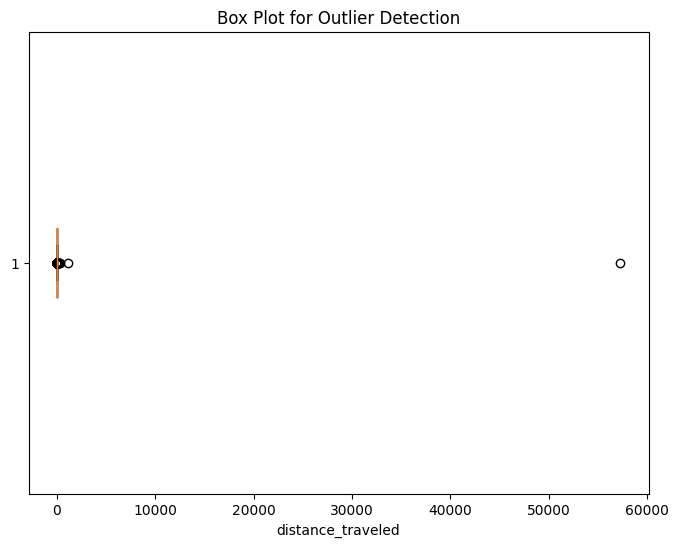

In [12]:
#to find outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['distance_traveled'], vert=False)
plt.xlabel('distance_traveled')
plt.title('Box Plot for Outlier Detection')
plt.show()

In [13]:
q1=1
q3=5
iqr=q3-q1
print(iqr)
lower_limit=q1+(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print(lower_limit)
print(upper_limit)

4
7.0
11.0


In [14]:
df['distance_traveled'] = df['distance_traveled'].apply(lambda x: min(x,upper_limit))

In [15]:
df['distance_traveled'].describe()

count    209673.000000
mean          4.250519
std           3.094836
min           0.020000
25%           1.950000
50%           3.200000
75%           5.730000
max          11.000000
Name: distance_traveled, dtype: float64

In [16]:
df['distance_traveled']=df['distance_traveled'].astype(int)

In [17]:
#num_of_passengers
df['num_of_passengers'].isnull().sum()

0

In [18]:
df['num_of_passengers'].describe()

count    209673.000000
mean          1.292808
std           0.930754
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: num_of_passengers, dtype: float64

In [19]:
df['num_of_passengers']=df['num_of_passengers'].astype(int)

In [20]:
df['num_of_passengers'].unique()

array([1, 3, 2, 0, 6, 5, 4, 8, 7, 9])

In [21]:
#here we can see 0 in the data it mean no passenger we need to fill the 0
sum(df['num_of_passengers']==0)

753

In [22]:
mean_passengers = df[df['num_of_passengers'] != 0]['num_of_passengers'].mean()
df['num_of_passengers']=df['num_of_passengers'].replace(0, mean_passengers)

In [23]:
df['num_of_passengers'].unique()

array([1.        , 3.        , 2.        , 1.29746793, 6.        ,
       5.        , 4.        , 8.        , 7.        , 9.        ])

In [24]:
df['num_of_passengers']=df['num_of_passengers'].astype(int)

In [25]:
df['num_of_passengers'].unique()

array([1, 3, 2, 6, 5, 4, 8, 7, 9])

In [26]:
#fare -  What's the base fare for the journey?[In INR]
df['fare'].isnull().sum()

0

In [27]:
df['fare'].describe()

count    209673.000000
mean         99.623431
std          85.602702
min           0.000000
25%          52.500000
50%          75.000000
75%         116.250000
max        4466.250000
Name: fare, dtype: float64

In [28]:
sum(df['fare']==0)

155

In [29]:
q1=52
q3=116
iqr=q3-q1
#print(iqr) - 64
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print(lower_limit)
print(upper_limit)


-44.0
212.0


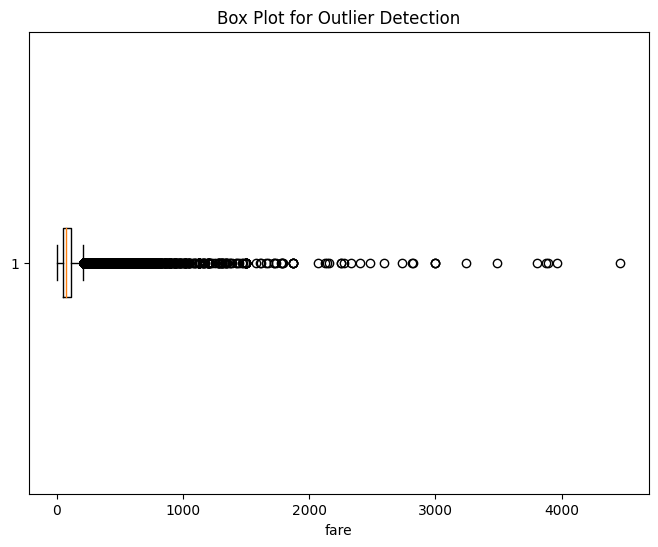

In [30]:
# to find outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['fare'], vert=False)
plt.xlabel('fare')
plt.title('Box Plot for Outlier Detection')
plt.show()

In [31]:
#to find the median value for the fare column
median_fare=df['fare'].median()
print(median_fare)

75.0


In [32]:
#to replace the 0 value into meadin value of fare column
df['fare']=df['fare'].replace(0,median_fare)

In [33]:
#here we can see the 0 value is replace with median value
sum(df['fare']==0)

0

In [34]:
#convert float into int datatype
df['fare']=df['fare'].astype(int)

In [35]:
df['fare'].dtype

dtype('int64')

In [36]:
#tip - How much did the driver receive in tips?[In INR]
df['tip'].isnull().sum()

0

In [37]:
df['tip'].describe()

count    209673.000000
mean         13.030824
std          20.367764
min           0.000000
25%           0.000000
50%           9.000000
75%          20.000000
max        2500.000000
Name: tip, dtype: float64

In [38]:
df.shape[0]

209673

In [39]:
# how many rows[people] not paid tip for the driver
sum(df['tip']==0)

93408

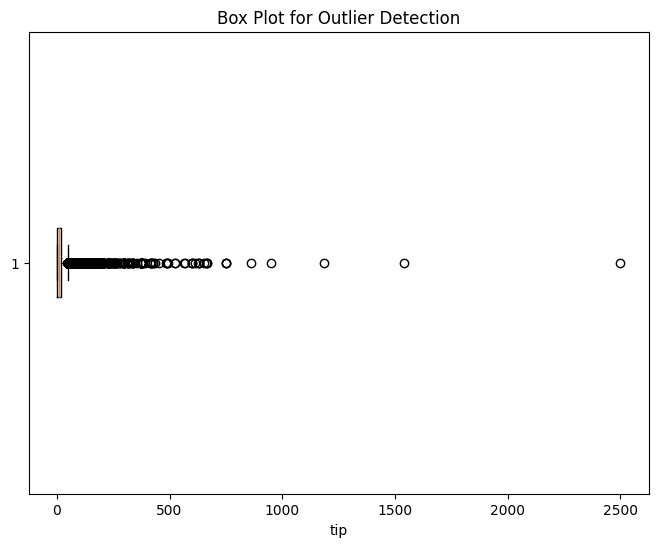

In [40]:
#too see outlier we do box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['tip'], vert=False)
plt.xlabel('tip')
plt.title('Box Plot for Outlier Detection')
plt.show()

In [41]:
#so we can treat the outliers with iqr method
q1=0
q3=20
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print(lower_limit)
print(upper_limit)

-30.0
50.0


In [42]:
#change the values if the values is greater than upper_limit
df['tip'] = df['tip'].apply(lambda x: min(x,upper_limit))

In [43]:
df['tip'].describe()

count    209673.000000
mean         12.109742
std          14.039808
min           0.000000
25%           0.000000
50%           9.000000
75%          20.000000
max          50.000000
Name: tip, dtype: float64

In [44]:
df['tip']=df['tip'].astype(int)

In [45]:
#miscellaneous_fees - Were there any additional charges during the trip?e.g. tolls, convenience fees, GST etc.[In INR]
df['miscellaneous_fees'].isnull().sum()

0

In [46]:
df['miscellaneous_fees'].describe()

count    209673.000000
mean         15.136829
std          12.553436
min          -0.500000
25%           6.000000
50%           9.750000
75%          26.450000
max         435.000000
Name: miscellaneous_fees, dtype: float64

In [47]:
q1=6
q3=26
iqr=q3-q1
print(iqr)
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print(lower_limit)
print(upper_limit)

20
-24.0
56.0


In [48]:
df['miscellaneous_fees']=df['miscellaneous_fees'].astype(int)

In [49]:
#total_fare - The grand total for the ride (this is your prediction target!).[In INR]
df['total_fare'].isnull().sum()

0

In [50]:
df['total_fare'].describe()

count    209673.000000
mean        127.791084
std          98.797374
min           0.000000
25%          70.200000
50%         101.700000
75%         152.250000
max        4472.250000
Name: total_fare, dtype: float64

In [51]:
q1=70
q3=152
iqr=q3-q1
#print(iqr) - 82
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print(lower_limit)
print(upper_limit)

-53.0
275.0


In [52]:
sum(df['total_fare']==0) #here we can see the total_fare is 0 so we need to treat the 0 values

129

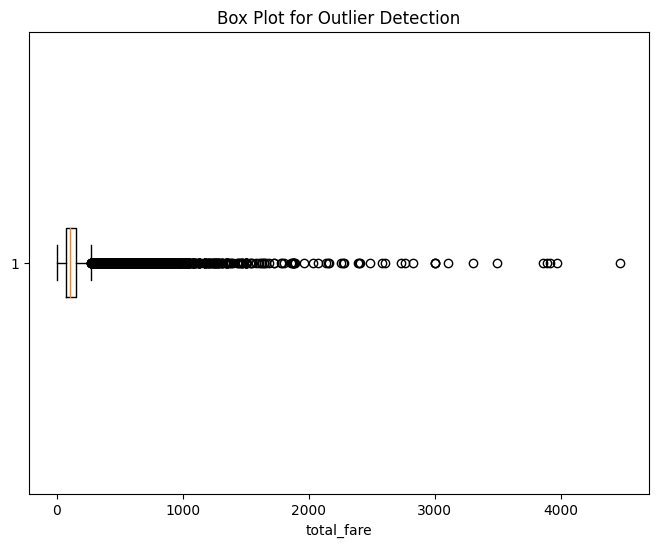

In [53]:
#to see outliers box plot for total fare
plt.figure(figsize=(8, 6))
plt.boxplot(df['total_fare'], vert=False)
plt.xlabel('total_fare')
plt.title('Box Plot for Outlier Detection')
plt.show()

In [54]:
#here we can see more outlier so we tool medain of the total fare and treat the 0
median_totalfare=df['total_fare'].median()
print(median_totalfare)

101.7


In [55]:
#to replace 0 with median value
df['total_fare']=df['total_fare'].replace(0,median_totalfare)

In [56]:
#here we can see no 0 in total_fare
sum(df['total_fare']==0)

0

In [57]:
df['total_fare']=df['total_fare'].astype(int)

In [58]:
#surge_applied -  Was there a surge pricing applied? Yes or no?

In [59]:
df['surge_applied'].value_counts()

0    150855
1     58818
Name: surge_applied, dtype: int64

In [60]:
#eda
#1.Distribution of feature
#2.feature vs target

In [61]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [62]:
#categorical column - num_of_passengers, surge_applied
#numeric_column - trip_duration, distance_traveled , fare, tip,miscellaneous_fees
#target - total_fare(continerous data column)

In [63]:
df['num_of_passengers'].value_counts().sort_values(ascending=True)

7         2
9         8
8        25
4       908
3      2757
6      3382
5      4713
2     17896
1    179982
Name: num_of_passengers, dtype: int64

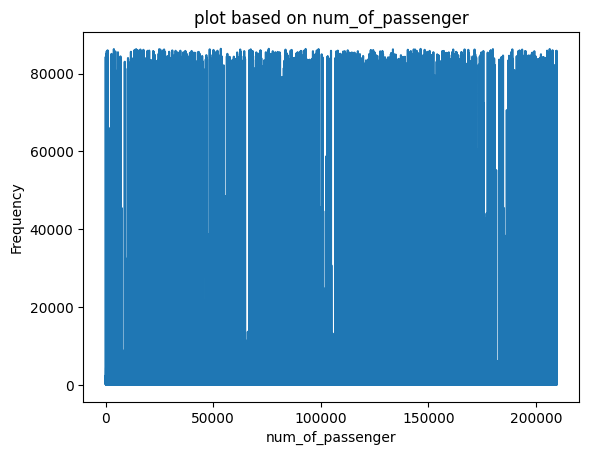

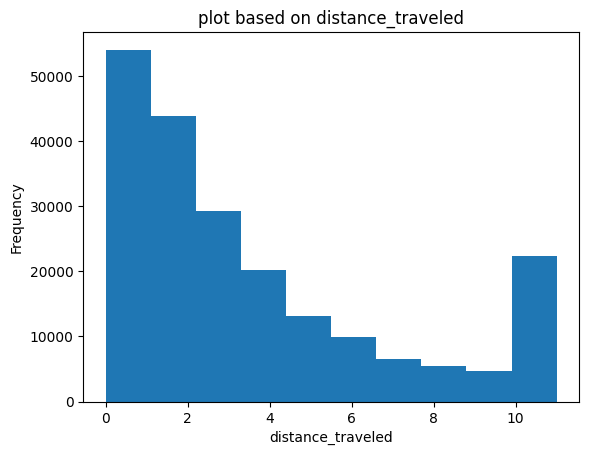

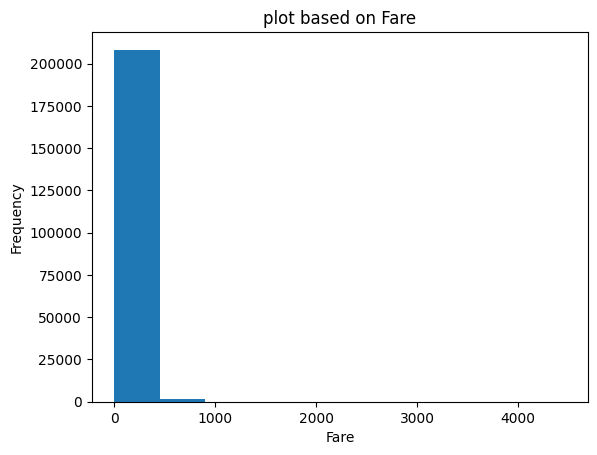

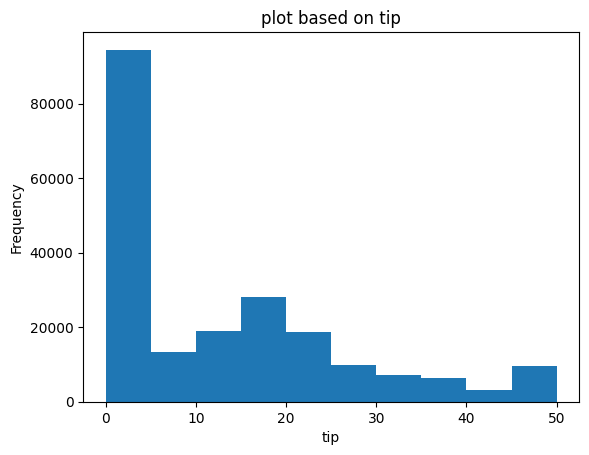

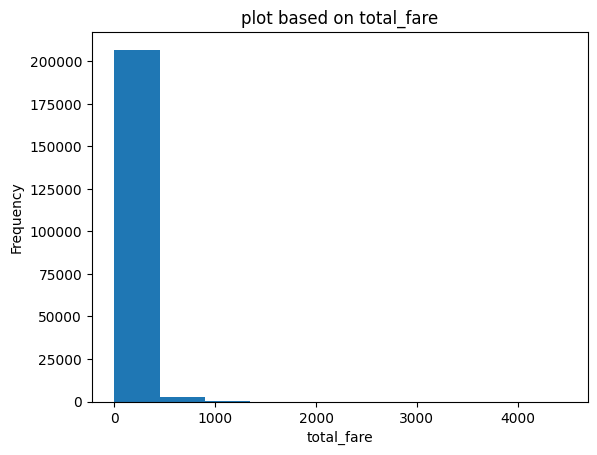

In [64]:
# plot for numeric(contineous)
plt.plot(df['trip_duration'])
plt.xlabel('num_of_passenger')
plt.ylabel('Frequency')
plt.title('plot based on num_of_passenger')
plt.show()

sorted_data=df['distance_traveled'].sort_values(ascending=False)
plt.hist(sorted_data)
plt.xlabel('distance_traveled')
plt.ylabel('Frequency')
plt.title('plot based on distance_traveled')
plt.show()

sorted_data1=df['fare'].sort_values(ascending=False)
plt.hist(sorted_data1)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('plot based on Fare')
plt.show()

sorted_data2=df['tip'].sort_values(ascending=False)
plt.hist(sorted_data2)
plt.xlabel('tip')
plt.ylabel('Frequency')
plt.title('plot based on tip')
plt.show()

sorted_data3=df['total_fare'].sort_values(ascending=False)
plt.hist(sorted_data3)
plt.xlabel('total_fare')
plt.ylabel('Frequency')
plt.title('plot based on total_fare')
plt.show()



#miscellaneous_fees

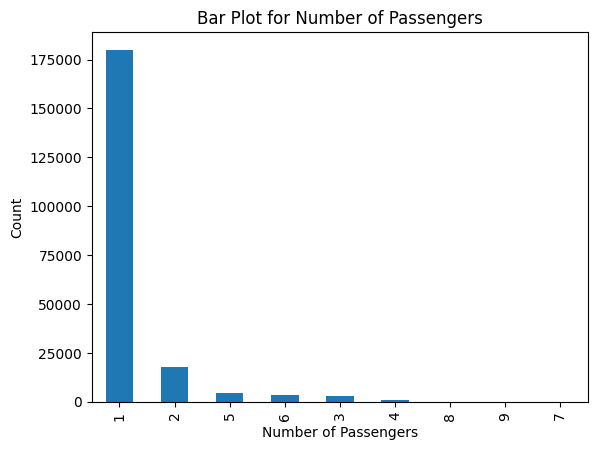

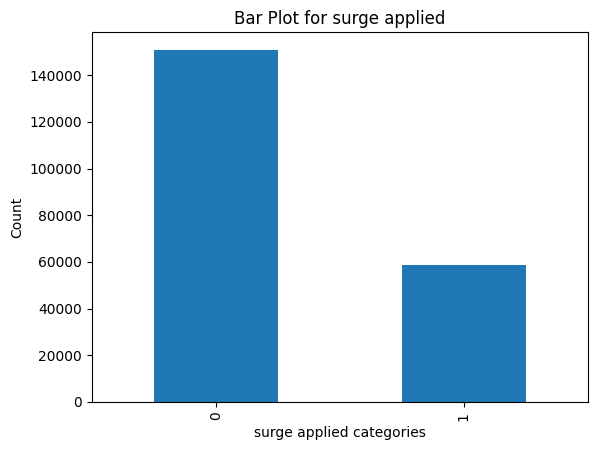

In [65]:
#plot for categorical column

passenger_count=df['num_of_passengers'].value_counts()
passenger_count.plot(kind='bar')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Bar Plot for Number of Passengers')
plt.show()

surge_applied_count=df['surge_applied'].value_counts()
surge_applied_count.plot(kind='bar')
plt.xlabel('surge applied categories')
plt.ylabel('Count')
plt.title('Bar Plot for surge applied')
plt.show()


In [66]:
#feature vs target
#orders for all categrical column
#df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
passenger_order=df.groupby('num_of_passengers')['total_fare'].mean().reset_index().sort_values('total_fare')['num_of_passengers']
surge_order=df.groupby('surge_applied')['total_fare'].mean().reset_index().sort_values('total_fare')['surge_applied']

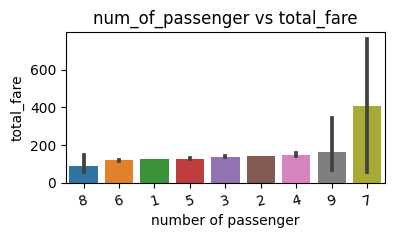

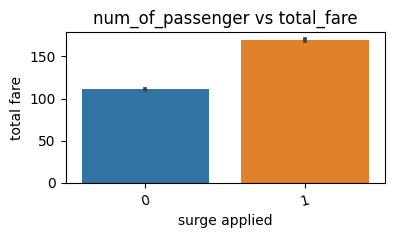

In [67]:
plt.figure(figsize=(14,9))
plt.subplot(431)
sns.barplot(x=df['num_of_passengers'],y=df['total_fare'],order=passenger_order)
plt.xticks(rotation=15)
plt.xlabel('number of passenger')
plt.ylabel('total_fare')
plt.title('num_of_passenger vs total_fare')
plt.show()

plt.figure(figsize=(14,9))
plt.subplot(432)
sns.barplot(x=df['surge_applied'],y=df['total_fare'],order=surge_order)
plt.xticks(rotation=15)
plt.xlabel('surge applied')
plt.ylabel('total fare')
plt.title('num_of_passenger vs total_fare')
plt.show()

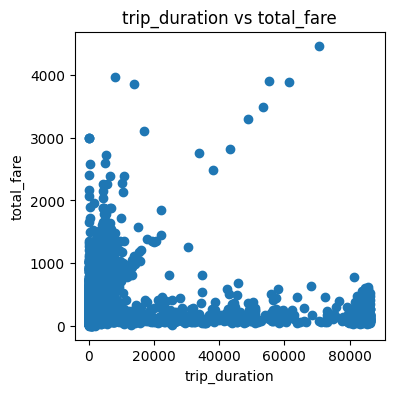

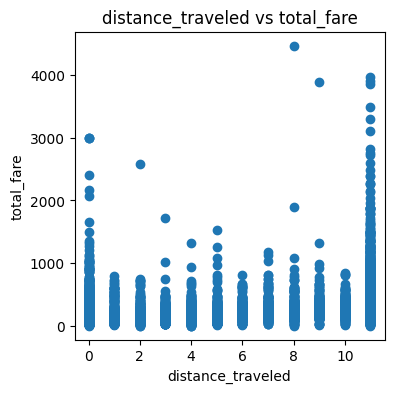

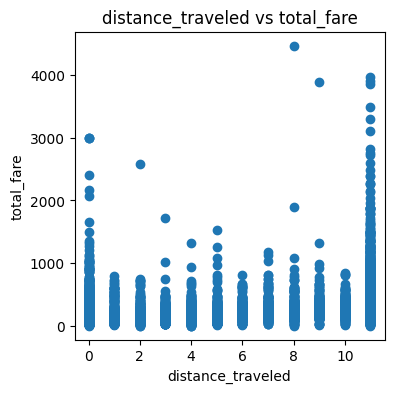

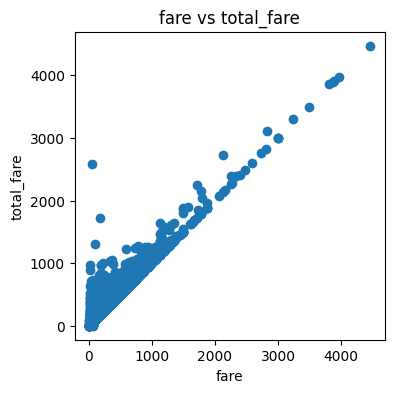

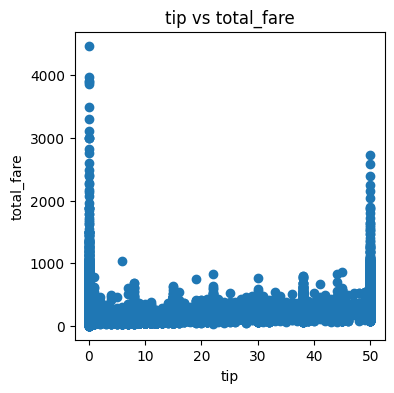

In [68]:
# feature vs targer
plt.figure(figsize=(4, 4))
plt.scatter(df['trip_duration'], df['total_fare'])
plt.xlabel('trip_duration')
plt.ylabel('total_fare')
plt.title('trip_duration vs total_fare')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df['distance_traveled'], df['total_fare'])
plt.xlabel('distance_traveled')
plt.ylabel('total_fare')
plt.title('distance_traveled vs total_fare')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df['distance_traveled'], df['total_fare'])
plt.xlabel('distance_traveled')
plt.ylabel('total_fare')
plt.title('distance_traveled vs total_fare')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df['fare'], df['total_fare'])
plt.xlabel('fare')
plt.ylabel('total_fare')
plt.title('fare vs total_fare')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df['tip'], df['total_fare'])
plt.xlabel('tip')
plt.ylabel('total_fare')
plt.title('tip vs total_fare')
plt.show()

In [69]:
numeric_feature=df.select_dtypes(include=[np.number])
numeric_feature

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2,1,75,24,6,105,0
1,1187,3,1,105,24,13,142,0
2,730,3,1,71,0,26,97,1
3,671,5,3,90,0,9,99,0
4,329,2,1,45,12,13,70,0
...,...,...,...,...,...,...,...,...
209668,1617,8,1,150,47,5,202,0
209669,438,1,1,48,12,34,95,1
209670,571,2,1,63,0,6,69,0
209671,491,2,1,56,0,13,69,0


In [70]:
corelation=numeric_feature.corr()
print(corelation['total_fare'].sort_values(ascending=False))

total_fare            1.000000
fare                  0.966831
distance_traveled     0.735726
miscellaneous_fees    0.451888
tip                   0.441001
surge_applied         0.266447
trip_duration         0.142368
num_of_passengers     0.014008
Name: total_fare, dtype: float64


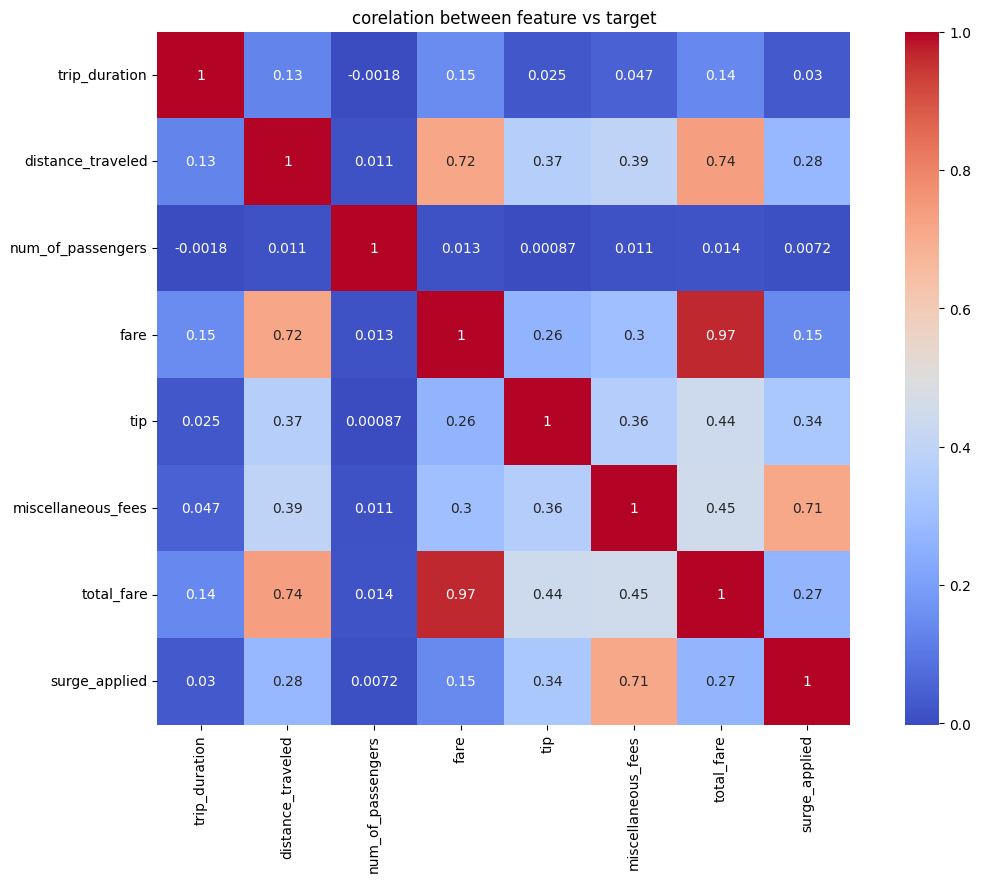

In [71]:
f,ax=plt.subplots(figsize=(14,9))
plt.title("corelation between feature vs target")
sns.heatmap(corelation,square=True,annot=True,cmap='coolwarm')
plt.show()

In [72]:
#here we can see the fare and total_fare more or less same so we can doro fare
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2,1,75,24,6,105,0
1,1187,3,1,105,24,13,142,0
2,730,3,1,71,0,26,97,1
3,671,5,3,90,0,9,99,0
4,329,2,1,45,12,13,70,0


In [73]:
#total_fare is a target variable
#now we are going to build the model
#df=df.drop(columns=['total_fare'])
y=df['total_fare']
df=df.drop(columns=['total_fare'])
x=df

In [74]:
x=df.loc[:,'trip_duration':'surge_applied']
y
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [75]:
#scaling the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [76]:
#linear regression - y=m*x+c
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_)  # c value
print(lr.coef_) #m value(feature)

127.49054477816595
[-5.13193650e-02 -1.55257332e+00  1.56708967e-01  8.92203215e+01
  1.64591816e+01  1.40459381e+01 -1.69239392e+00]


In [77]:
#feature prediction
lr.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 7256.97531964, 10007.82475639,  6783.67121993, ...,
        5800.39463167,  5278.27949747, 30020.44097675])

In [78]:
#predict the entire data
x_predict=lr.predict(x_train)
print(x_predict)
y_predict=lr.predict(x_test)
print(y_predict)

[ 41.517985    75.16965566  55.74539557 ... 143.75408482  68.48754406
  94.28690671]
[287.07475042  71.79144668 178.31503307 ... 203.00919925  93.54797067
  99.24644735]


In [79]:
#evaluation metric - r2 square
print('r2 score:',r2_score(y_test,y_predict))

r2 score: 0.9840915365535613


In [80]:
#rmse value for linear regression
train_rmse=np.sqrt(mean_squared_error(y_train,x_predict))
print("Root Mean Square Error (RMSE) - train:", train_rmse)
test_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("Root Mean Square Error (RMSE) - test:", test_rmse)

Root Mean Square Error (RMSE) - train: 11.604572566317296
Root Mean Square Error (RMSE) - test: 11.98182159139812


In [81]:
#knn algorithm
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  print('k_value:',i,'score:',np.mean(cross_val_score(knn,x_train,y_train,cv=10)))

k_value: 1 score: 0.972466950685343
k_value: 2 score: 0.9810318645480681
k_value: 3 score: 0.9828156222635208
k_value: 4 score: 0.98357263776735
k_value: 5 score: 0.9835103104665655
k_value: 6 score: 0.9833874168525061
k_value: 7 score: 0.9832128906557701
k_value: 8 score: 0.9831288567228604
k_value: 9 score: 0.9829362558854763
k_value: 10 score: 0.982471225141977
k_value: 15 score: 0.9801740699142568
k_value: 20 score: 0.9778792969783972


In [82]:
#here we can see the the k=4 is the best value becasue after 4 it start reducing so we choose 4 as a best value
#train
x_pred1=knn.predict(x_train)
print(x_pred1)
#test
y_pred1=knn.predict(x_test)
print(y_pred1)

[ 43.    74.    58.   ... 143.95  69.    92.  ]
[280.55  74.9  175.   ... 204.1   92.    93.75]


In [83]:
#evaluation matric for knn r2 score
print('r2 score:',r2_score(y_test,y_pred1))

r2 score: 0.9781890492003346


In [84]:
#rmse value knn algorithm
#train
train_rmse1=np.sqrt(mean_squared_error(y_train, x_pred1))
print("Root Mean Square Error (RMSE):",train_rmse1)
#test
test_rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Root Mean Square Error (RMSE):", test_rmse1)

Root Mean Square Error (RMSE): 13.730323529545664
Root Mean Square Error (RMSE): 14.029623955641563


In [85]:
#decision tree
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
  dt=DecisionTreeRegressor(max_depth=i)
  dt.fit(x_train,y_train)
  val_accuracy=cross_val_score(dt,x_train,y_train,cv=10)
  print('Depth:',i,'cross_val_score:',np.mean(val_accuracy))

Depth: 1 cross_val_score: 0.48898953674219536
Depth: 2 cross_val_score: 0.7350374000758608
Depth: 3 cross_val_score: 0.8687383314236762
Depth: 4 cross_val_score: 0.931410668393554
Depth: 5 cross_val_score: 0.9560701140960861
Depth: 6 cross_val_score: 0.9681817570251564
Depth: 7 cross_val_score: 0.9745024559063845
Depth: 8 cross_val_score: 0.9785640722867026
Depth: 9 cross_val_score: 0.9795912155826609
Depth: 10 cross_val_score: 0.9796062348726198
Depth: 15 cross_val_score: 0.9784482476711529
Depth: 20 cross_val_score: 0.9781187516756173


In [86]:
#train
x_pred2=dt.predict(x_train)
print(x_pred2)
#test
y_pred2=dt.predict(x_test)
print(y_pred2)

[ 43.  74.  58. ... 144.  69.  92.]
[261.  71. 175. ... 204.  92.  97.]


In [87]:
#depth 10 is the best value for max_depth because after 10 the cross val score is decreasing
#evaluation matrix
print('r2 score:',r2_score(y_test,y_pred2))

r2 score: 0.9691037737592376


In [88]:
#rmse value for decession tree
#train
train_rmse2 = np.sqrt(mean_squared_error(y_train, x_pred2))
print("Root Mean Square Error (RMSE) - test:", train_rmse2)
#test
test_rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Root Mean Square Error (RMSE) - test:", test_rmse2)

Root Mean Square Error (RMSE) - test: 0.8600188620288243
Root Mean Square Error (RMSE) - test: 16.697884388449424


In [89]:
#random forest algorithm
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
  rf=RandomForestRegressor(n_estimators=i)
  rf.fit(x_train,y_train)
  val_accuracy1=cross_val_score(rf,x_train,y_train,cv=10)
  print('n_estmator_value:',i,'cross_val_score:',np.mean(val_accuracy1))


n_estmator_value: 1 cross_val_score: 0.9770638249795913
n_estmator_value: 2 cross_val_score: 0.9806070913990805
n_estmator_value: 3 cross_val_score: 0.9818231479137067
n_estmator_value: 4 cross_val_score: 0.9832628438323704
n_estmator_value: 5 cross_val_score: 0.9848666932681296
n_estmator_value: 6 cross_val_score: 0.9850489230490332
n_estmator_value: 7 cross_val_score: 0.9842866195802653
n_estmator_value: 8 cross_val_score: 0.9844320899805844
n_estmator_value: 9 cross_val_score: 0.983886438859068
n_estmator_value: 10 cross_val_score: 0.9847240289477485
n_estmator_value: 15 cross_val_score: 0.98460147077041
n_estmator_value: 20 cross_val_score: 0.9841289393583059


In [90]:
#here we can see n_estmator_value: 8 is the best value

In [91]:
#train
x_pred3=rf.predict(x_train)
print(x_pred3)
#test
y_pred3=rf.predict(x_test)
print(y_pred3)

[ 43.  74.  58. ... 144.  69.  92.]
[267.7   70.55 175.   ... 204.    92.    97.  ]


In [92]:
#evaluation matrix
print('r2 score:',r2_score(y_test,y_pred3))

r2 score: 0.979952696191641


In [93]:
#rmse value
#train
train_rmse3 = np.sqrt(mean_squared_error(y_train, x_pred3))
print("Root Mean Square Error (RMSE)-train:", train_rmse3)

#test
test_rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Root Mean Square Error (RMSE)-test:", test_rmse3)

Root Mean Square Error (RMSE)-train: 4.551690774254178
Root Mean Square Error (RMSE)-test: 13.450446998297291


In [94]:
#boosting method
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.01,0.1,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate=i,n_estimators=100)
  model.fit(x_train,y_train)
  #model.score(x_test,y_test)
  print('learning_rate:',i,'Train_score:',model.score(x_test,y_test),'cross_val_score:',np.mean(cross_val_score(model,x_train,y_train,cv=10)))


learning_rate: 0.01 Train_score: 0.8028034235664201 cross_val_score: 0.7829794252986824
learning_rate: 0.02 Train_score: 0.9086360683639023 cross_val_score: 0.8936688442053333
learning_rate: 0.03 Train_score: 0.9209811301996258 cross_val_score: 0.9100393886290297
learning_rate: 0.04 Train_score: 0.921381426450974 cross_val_score: 0.9125858662312403
learning_rate: 0.05 Train_score: 0.921051150239238 cross_val_score: 0.9133518580969987
learning_rate: 0.06 Train_score: 0.9213873934037997 cross_val_score: 0.913593348571189
learning_rate: 0.07 Train_score: 0.9206260183702176 cross_val_score: 0.9134322725045184
learning_rate: 0.08 Train_score: 0.921181158215399 cross_val_score: 0.9134925557806095
learning_rate: 0.09 Train_score: 0.9193084544686152 cross_val_score: 0.9118928844168458
learning_rate: 0.01 Train_score: 0.8028034235664201 cross_val_score: 0.7829794252986824
learning_rate: 0.1 Train_score: 0.9204813423005038 cross_val_score: 0.912450939814174
learning_rate: 0.5 Train_score: 0.9154

In [95]:
#here the best learning rate is 0.06

In [96]:
#here 0.06 is the best value for boosting algorithm
#train
x_pred4=model.predict(x_train)
print(x_pred4)
#test
y_pred4=model.predict(x_test)
print(y_pred4)

[ 43.168964  73.85232   57.750103 ... 145.96217   69.49617   91.24412 ]
[274.15976  71.03275 174.48447 ... 204.30447  93.54841  97.41025]


In [97]:
#evaluation metrix
print('r2 score:',r2_score(y_test,y_pred4))

r2 score: 0.89343946154682


In [98]:
#rmsc for boosting
#train
train_rmse4 = np.sqrt(mean_squared_error(y_train, x_pred4))
print("Root Mean Square Error (RMSE) - train:", train_rmse4)
#test
test_rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
print("Root Mean Square Error (RMSE) - test:", test_rmse4)

Root Mean Square Error (RMSE) - train: 20.320276915658404
Root Mean Square Error (RMSE) - test: 31.010369043431076


In [98]:
#conclusion
#we build 5 model they are linear regression,knn , decision tree, random forest, xbg
#Linear regression rmse score
   #Root Mean Square Error (RMSE) - train: 11.604572566317296
   #Root Mean Square Error (RMSE) - test: 11.98182159139812

#knn rmse score
   #Root Mean Square Error (RMSE): 13.730323529545664
   #Root Mean Square Error (RMSE): 14.029623955641563

#decison tree
   #Root Mean Square Error (RMSE) - test: 0.8600188620288243
   #Root Mean Square Error (RMSE) - test: 16.697884388449424

#random forest
   #Root Mean Square Error (RMSE)-train: 4.551690774254178
   #Root Mean Square Error (RMSE)-test: 13.450446998297291

#xgboost
   #Root Mean Square Error (RMSE) - train: 20.320276915658404
   #Root Mean Square Error (RMSE) - test: 31.010369043431076

#from all these model linear regression is the best one because the value of rmse of train and test
# is almost equal so we can conside linear is the best one
